# Customer Lifetime value (Пожизненная ценность клиента)


# EDA

In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [92]:
data_file = "../csv/clv/customer_lifetime_value.csv"
dataset = pd.read_csv(data_file)
ds = dataset.copy()
ds.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [93]:
ds.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Сразу можем дропнуть колонку Customer	

In [94]:
col_to_drop = ['Customer']

## Посмотрим на нашу целевую переменную

<AxesSubplot:xlabel='Customer Lifetime Value'>

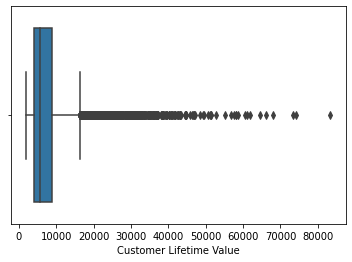

In [95]:
sns.boxplot(ds['Customer Lifetime Value'])

<AxesSubplot:>

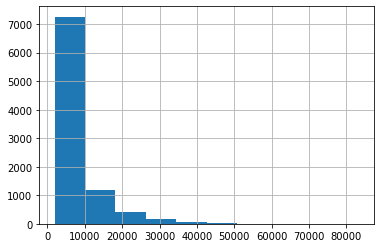

In [96]:
ds['Customer Lifetime Value'].hist()

In [97]:
ds[ds['Customer Lifetime Value']  > 40000].count()

Customer                         60
State                            60
Customer Lifetime Value          60
Response                         60
Coverage                         60
Education                        60
Effective To Date                60
EmploymentStatus                 60
Gender                           60
Income                           60
Location Code                    60
Marital Status                   60
Monthly Premium Auto             60
Months Since Last Claim          60
Months Since Policy Inception    60
Number of Open Complaints        60
Number of Policies               60
Policy Type                      60
Policy                           60
Renew Offer Type                 60
Sales Channel                    60
Total Claim Amount               60
Vehicle Class                    60
Vehicle Size                     60
dtype: int64

In [98]:
ds['Customer Lifetime Value'].describe(percentiles=[0.99,0.95])

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
50%       5780.182197
95%      22064.361267
99%      35971.104520
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [99]:
ds = ds[ds['Customer Lifetime Value'] < 30000]

<AxesSubplot:>

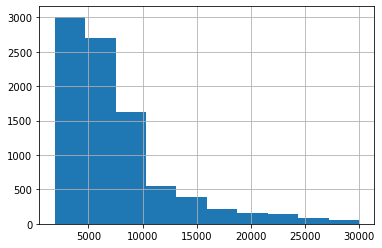

In [100]:
ds['Customer Lifetime Value'].hist()

## Доход

<AxesSubplot:ylabel='Frequency'>

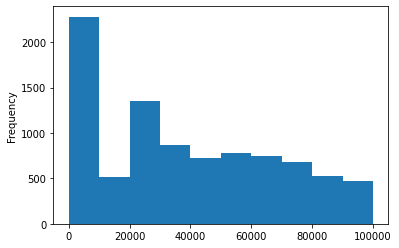

In [101]:
ds['Income'].plot.hist()

In [102]:
ds[ds['Income'] == 0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

### Похоже, что нули в колонке Income не являются ошибками данных

In [103]:
ds['Income'].isna().any()

False

### Эту колонку можно оставить без изменений

# Monthly Premium Auto

<AxesSubplot:ylabel='Frequency'>

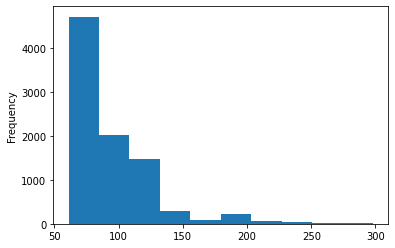

In [104]:
ds['Monthly Premium Auto'].plot.hist()

In [105]:
ds['mon_prem_auto_log'] = np.log(ds['Monthly Premium Auto'])

<AxesSubplot:>

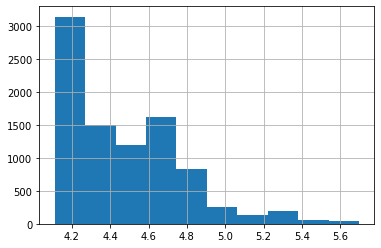

In [106]:
ds['mon_prem_auto_log'].hist()

In [107]:
col_to_drop.append('Monthly Premium Auto')

# Months Since Last Claim

<AxesSubplot:>

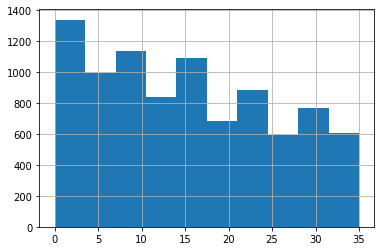

In [108]:
ds['Months Since Last Claim'].hist()

### Тут все хорошо, оставляем как есть

# Months Since Policy Inception

<AxesSubplot:>

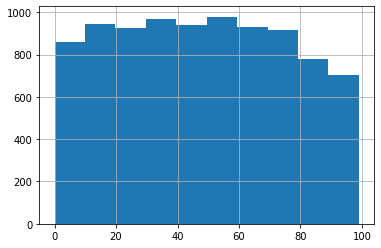

In [109]:
ds['Months Since Policy Inception'].hist()

### Тоже оставляем

# Number of Open Complaints

<AxesSubplot:>

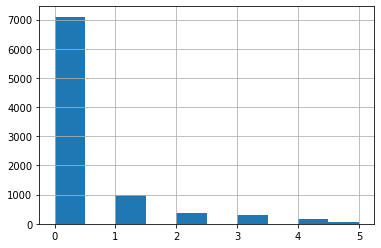

In [110]:
ds['Number of Open Complaints'].hist()

### Тут лучше сделать 0 / не 0

In [111]:
ds['сomplaints'] = ds['Number of Open Complaints'].apply(lambda x: 1 if x != 0 else 0)

<AxesSubplot:>

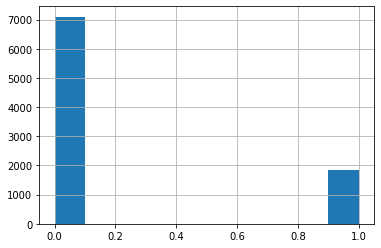

In [112]:
ds['сomplaints'].hist()

In [113]:
col_to_drop.append('Number of Open Complaints')

# State

<AxesSubplot:>

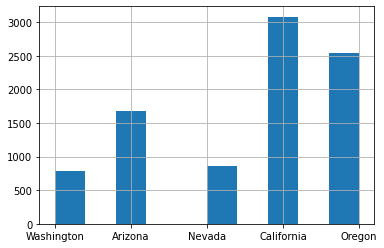

In [114]:
ds["State"].hist()

### Тут хорошо подойдет OneHotEncoding

In [115]:
ds = pd.get_dummies(ds, prefix='state_', columns=['State'])

In [116]:
ds.head()

,Customer,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Total Claim Amount,Vehicle Class,Vehicle Size,Mon_prem_auto_log,сomplaints,state__Arizona,state__California,state__Nevada,state__Oregon,state__Washington
0,BU79786,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,384.811147,Two-Door Car,Medsize,4.234107,0,0,0,0,0,1
1,QZ44356,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,1131.464935,Four-Door Car,Medsize,4.543295,0,1,0,0,0,0
2,AI49188,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,566.472247,Two-Door Car,Medsize,4.682131,0,0,0,1,0,0
3,WW63253,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,529.881344,SUV,Medsize,4.663439,0,0,1,0,0,0
4,HB64268,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,138.130879,Four-Door Car,Medsize,4.290459,0,0,0,0,0,1


# Response

<AxesSubplot:>

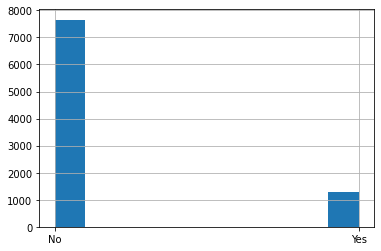

In [117]:
ds['Response'].hist()

In [118]:
ds = pd.get_dummies(ds, prefix='response_', columns=['Response'])

# Coverage

<AxesSubplot:>

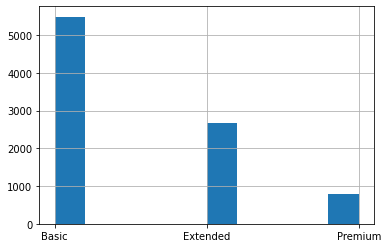

In [119]:
ds['Coverage'].hist()

In [120]:
ds = pd.get_dummies(ds, prefix='coverage_', columns=['Coverage'])

In [121]:
ds.head()

,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,state__Arizona,state__California,state__Nevada,state__Oregon,state__Washington,response__No,response__Yes,coverage__Basic,coverage__Extended,coverage__Premium
0,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,...,0,0,0,0,1,1,0,1,0,0
1,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,...,1,0,0,0,0,1,0,0,1,0
2,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,...,0,0,1,0,0,1,0,0,0,1
3,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,...,0,1,0,0,0,1,0,1,0,0
4,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,...,0,0,0,0,1,1,0,1,0,0


# Education

<AxesSubplot:>

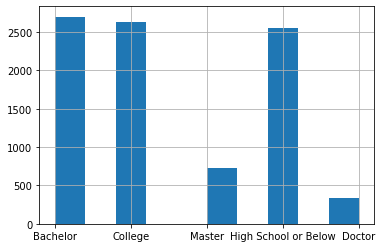

In [122]:
ds['Education'].hist()

In [123]:
ds = pd.get_dummies(ds, prefix='edu_', columns=['Education'])

# EmploymentStatus

<AxesSubplot:>

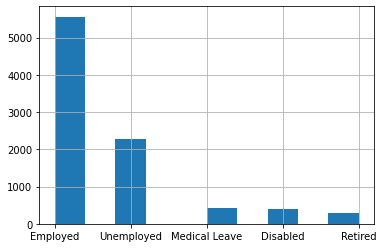

In [124]:
ds['EmploymentStatus'].hist()

In [125]:
ds = pd.get_dummies(ds, prefix='emp_stat_', columns=['EmploymentStatus'])

# Effective To Date

In [134]:
ds['Effective To Date'] = pd.to_datetime(
    ds['Effective To Date'], 
    format='%m/%d/%y', 
    errors='ignore'
)

<AxesSubplot:>

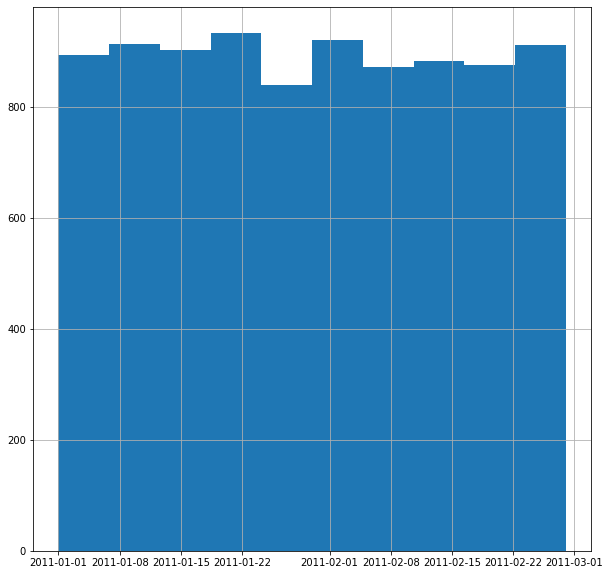

In [136]:
plt.figure(figsize=(10, 10))
ds['Effective To Date'].hist()

### Не похоже на какой-то информативный признак

In [138]:
col_to_drop.append('Effective To Date')

# Gender

In [139]:
ds = pd.get_dummies(ds, prefix='gender_', columns=['Gender'])

# Location Code

<AxesSubplot:>

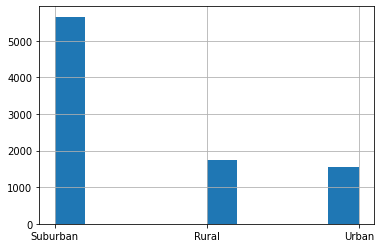

In [140]:
ds['Location Code'].hist()

In [142]:
ds = pd.get_dummies(ds, prefix='location_', columns=['Location Code'])

KeyError: "None of [Index(['Location Code'], dtype='object')] are in the [columns]"

In [151]:
ds.drop(columns=col_to_drop).head()

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,...,emp_stat__Retired,emp_stat__Unemployed,gender__F,gender__M,location__Rural,location__Suburban,location__Urban,marital__Divorced,marital__Married,marital__Single
0,2763.519279,56274,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,...,0,0,1,0,0,1,0,0,1,0
1,6979.535903,0,13,42,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,...,0,1,1,0,0,1,0,0,0,1
2,12887.431650,48767,18,38,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,...,0,0,1,0,0,1,0,0,1,0
3,7645.861827,0,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,...,0,1,0,1,0,1,0,0,1,0
4,2813.692575,43836,12,44,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,...,0,0,0,1,1,0,0,0,0,1


# Marital Status

<AxesSubplot:>

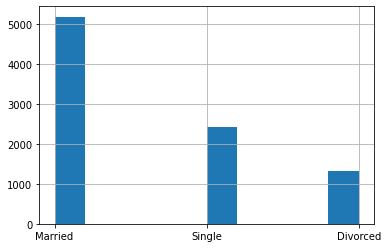

In [144]:
ds['Marital Status'].hist()

In [145]:
ds = pd.get_dummies(ds, prefix='marital_', columns=['Marital Status'])

# Number of Policies

<AxesSubplot:>

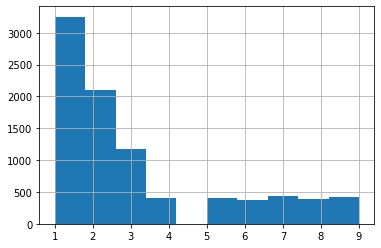

In [146]:
ds['Number of Policies'].hist()

### Так и оставим

In [150]:
ds.drop(columns=col_to_drop).columns

Index(['Customer Lifetime Value', 'Income', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Mon_prem_auto_log', 'сomplaints',
       'state__Arizona', 'state__California', 'state__Nevada', 'state__Oregon',
       'state__Washington', 'response__No', 'response__Yes', 'coverage__Basic',
       'coverage__Extended', 'coverage__Premium', 'edu__Bachelor',
       'edu__College', 'edu__Doctor', 'edu__High School or Below',
       'edu__Master', 'emp_stat__Disabled', 'emp_stat__Employed',
       'emp_stat__Medical Leave', 'emp_stat__Retired', 'emp_stat__Unemployed',
       'gender__F', 'gender__M', 'location__Rural', 'location__Suburban',
       'location__Urban', 'marital__Divorced', 'marital__Married',
       'marital__Single'],
      dtype='object')

# Policy Type

<AxesSubplot:>

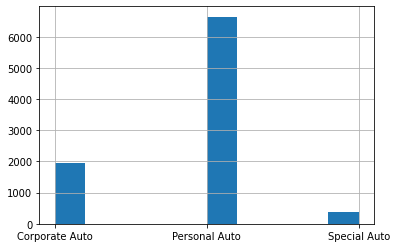

In [152]:
ds['Policy Type'].hist()

In [153]:
ds = pd.get_dummies(ds, prefix='policy_type_', columns=['Policy Type'])

# Policy

<AxesSubplot:>

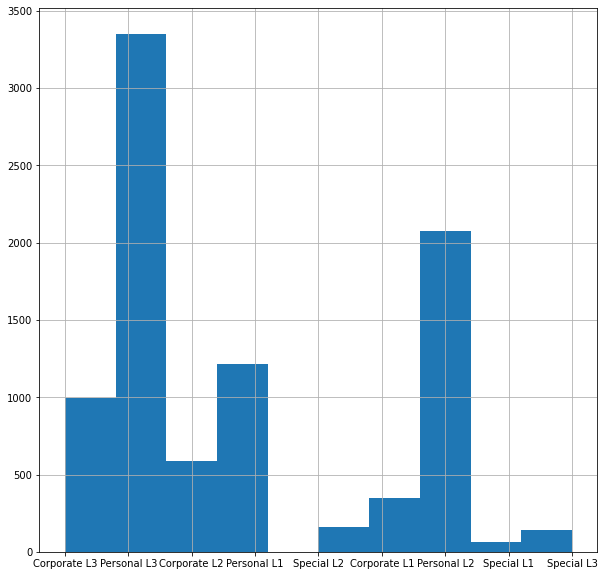

In [155]:
plt.figure(figsize=(10, 10))
ds['Policy'].hist()

### Кажется, колонка Policy Type уже не нужна, можно разбить полис на Corporate/ Personal/Special и на L1/L2/L3